In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report




In [3]:
clean_df = pd.read_csv("clean_resume_data.csv")

In [4]:
clean_df.head()

,ID,Category,Feature
0,16852973,HR,hr administrator marketing associate hr admini...
1,22323967,HR,hr specialist hr operations summary media prof...
2,33176873,HR,hr director summary years experience recruitin...
3,27018550,HR,hr specialist summary dedicated driven dynamic...
4,17812897,HR,hr manager skill highlights hr skills hr depar...


In [5]:
clean_df.shape

(2484, 3)

In [6]:
clean_df.info

<bound method DataFrame.info of             ID  Category                                            Feature
0     16852973        HR  hr administrator marketing associate hr admini...
1     22323967        HR  hr specialist hr operations summary media prof...
2     33176873        HR  hr director summary years experience recruitin...
3     27018550        HR  hr specialist summary dedicated driven dynamic...
4     17812897        HR  hr manager skill highlights hr skills hr depar...
...        ...       ...                                                ...
2479  99416532  AVIATION  rank sgt e non commissioned officer charge bri...
2480  24589765  AVIATION  government relations communications organizati...
2481  31605080  AVIATION  geek squad agent professional profile support ...
2482  21190805  AVIATION  program director office manager summary highly...
2483  37473139  AVIATION  storekeeper ii professional summary purpose do...

[2484 rows x 3 columns]>

Exploratory Data Analysis

In [7]:
clean_df['Category'].value_counts()

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
ADVOCATE                  118
CHEF                      118
ENGINEERING               118
ACCOUNTANT                118
FINANCE                   118
FITNESS                   117
AVIATION                  117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Category'>

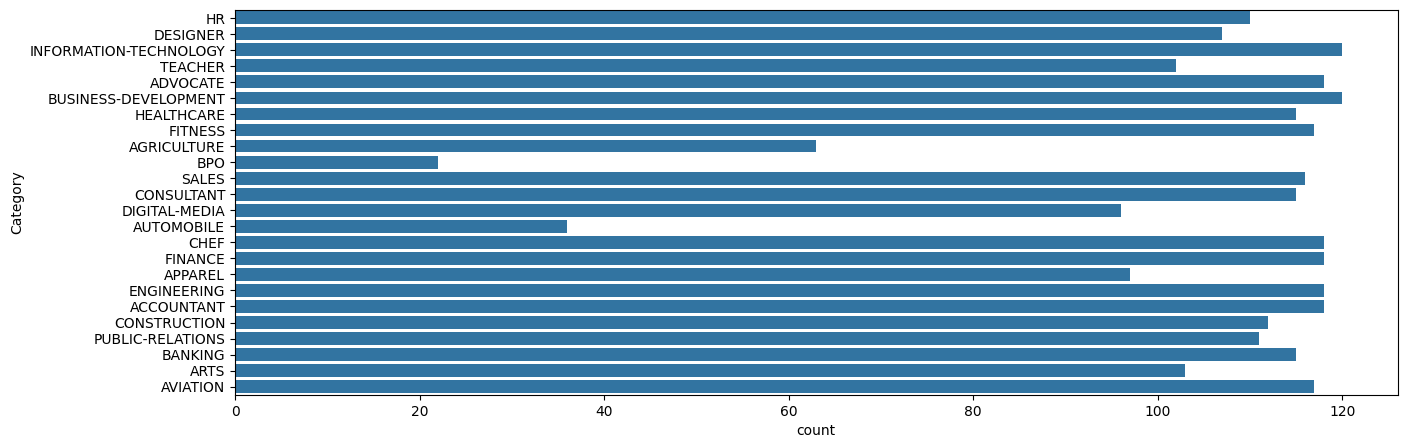

In [8]:
plt.figure(figsize=(15 ,5 ))
sns.countplot(clean_df['Category'])

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 [Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120'),
  Text(140.0, 0, '140')])

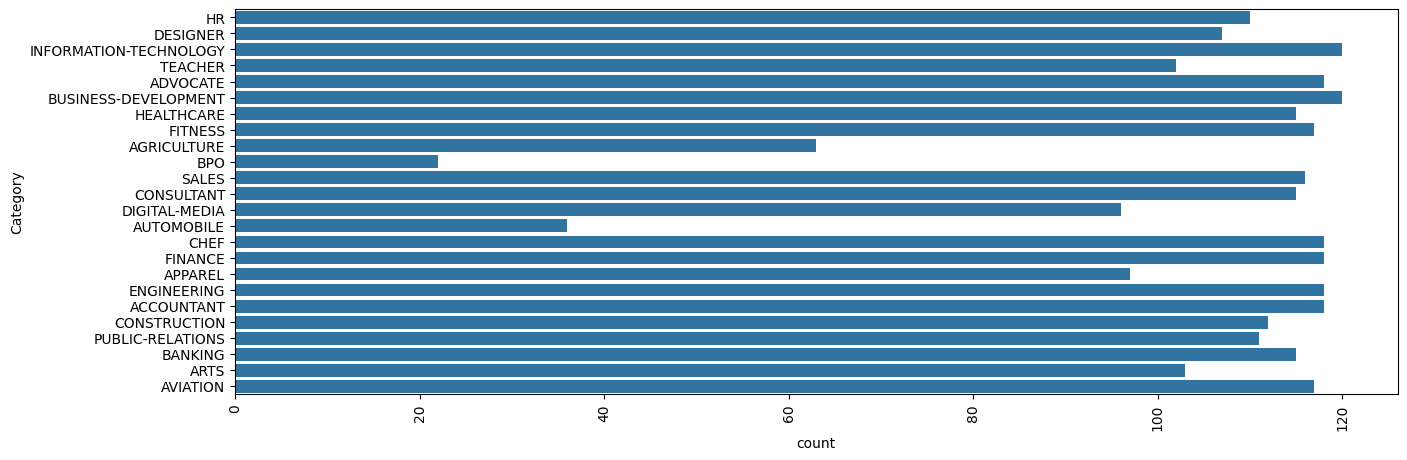

In [9]:
plt.figure(figsize=(15 ,5 ))
sns.countplot(clean_df['Category'])
plt.xticks(rotation=90)


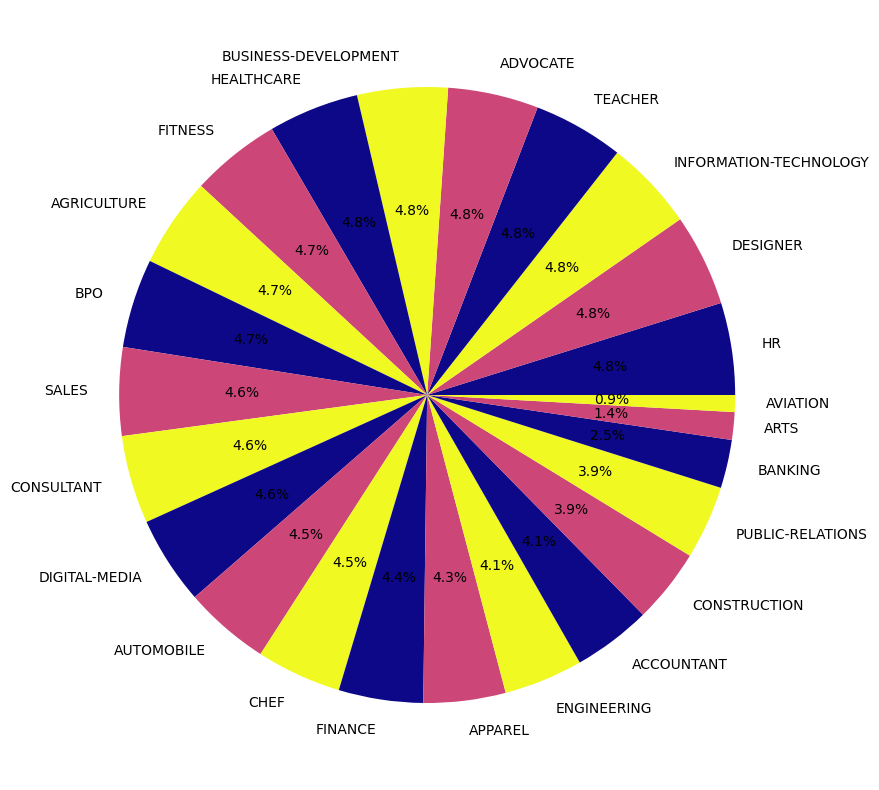

In [15]:
counts = clean_df['Category'].value_counts()
labels = clean_df['Category'].unique()
plt.figure(figsize=(15, 10))

plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=plt.cm.plasma(np.linspace(0, 1, 3)))
plt.show()

Balance Dataset

In [16]:
clean_df['Category'].value_counts()

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
ADVOCATE                  118
CHEF                      118
ENGINEERING               118
ACCOUNTANT                118
FINANCE                   118
FITNESS                   117
AVIATION                  117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

In [17]:
from sklearn.utils import resample

# Define the maximum count among all categories
max_count = clean_df['Category'].value_counts().max()

# Resample each category to match the maximum count
balanced_data = []
for category in clean_df['Category'].unique():
    category_data = clean_df[clean_df['Category'] == category]
    if len(category_data) < max_count:
        # Perform oversampling for categories with fewer samples
        balanced_category_data = resample(category_data, replace=True, n_samples=max_count, random_state=42)
    else:
        # Perform undersampling for categories with more samples
        balanced_category_data = resample(category_data, replace=False, n_samples=max_count, random_state=42)
    balanced_data.append(balanced_category_data)

# Concatenate the balanced data for all categories
balanced_df = pd.concat(balanced_data)

In [18]:
balanced_df['Category'].value_counts()

Category
HR                        120
DESIGNER                  120
INFORMATION-TECHNOLOGY    120
TEACHER                   120
ADVOCATE                  120
BUSINESS-DEVELOPMENT      120
HEALTHCARE                120
FITNESS                   120
AGRICULTURE               120
BPO                       120
SALES                     120
CONSULTANT                120
DIGITAL-MEDIA             120
AUTOMOBILE                120
CHEF                      120
FINANCE                   120
APPAREL                   120
ENGINEERING               120
ACCOUNTANT                120
CONSTRUCTION              120
PUBLIC-RELATIONS          120
BANKING                   120
ARTS                      120
AVIATION                  120
Name: count, dtype: int64

In [32]:
balanced_df.isnull().sum()
#balanced_df.dropna(inplace=True)

ID          0
Category    0
Feature     0
dtype: int64

Train-Test Split

In [39]:
x = balanced_df['Feature']
y = balanced_df['Category']
x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size=0.2, random_state=42)

Encoding (TF_IDF)

In [35]:
tfidf_vectorizer = TfidfVectorizer()
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)

Training Random Forest Classifier

In [42]:
min_samples = min(x_train_tfidf.shape[0], len(y_train))
x_train_tfidf = x_train_tfidf[:min_samples]
y_train = y_train[:min_samples]


In [48]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_train_tfidf, y_train)

# Accuracy Evaluation
y_pred = rf_classifier.predict(x_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))


Accuracy: 0.9375
                        precision    recall  f1-score   support

            ACCOUNTANT       1.00      1.00      1.00        21
              ADVOCATE       1.00      1.00      1.00        29
           AGRICULTURE       1.00      1.00      1.00        23
               APPAREL       1.00      1.00      1.00        21
                  ARTS       0.38      1.00      0.55        22
            AUTOMOBILE       1.00      1.00      1.00        19
              AVIATION       1.00      1.00      1.00        30
               BANKING       1.00      1.00      1.00        23
                   BPO       0.00      0.00      0.00        15
  BUSINESS-DEVELOPMENT       1.00      1.00      1.00        18
                  CHEF       1.00      1.00      1.00        28
          CONSTRUCTION       1.00      1.00      1.00        25
            CONSULTANT       1.00      1.00      1.00        31
              DESIGNER       1.00      1.00      1.00        28
         DIGITAL-MEDIA

/home/martin/Desktop/Resume Screening & Recommendation/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/martin/Desktop/Resume Screening & Recommendation/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/martin/Desktop/Resume Screening & Recommendation/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter t

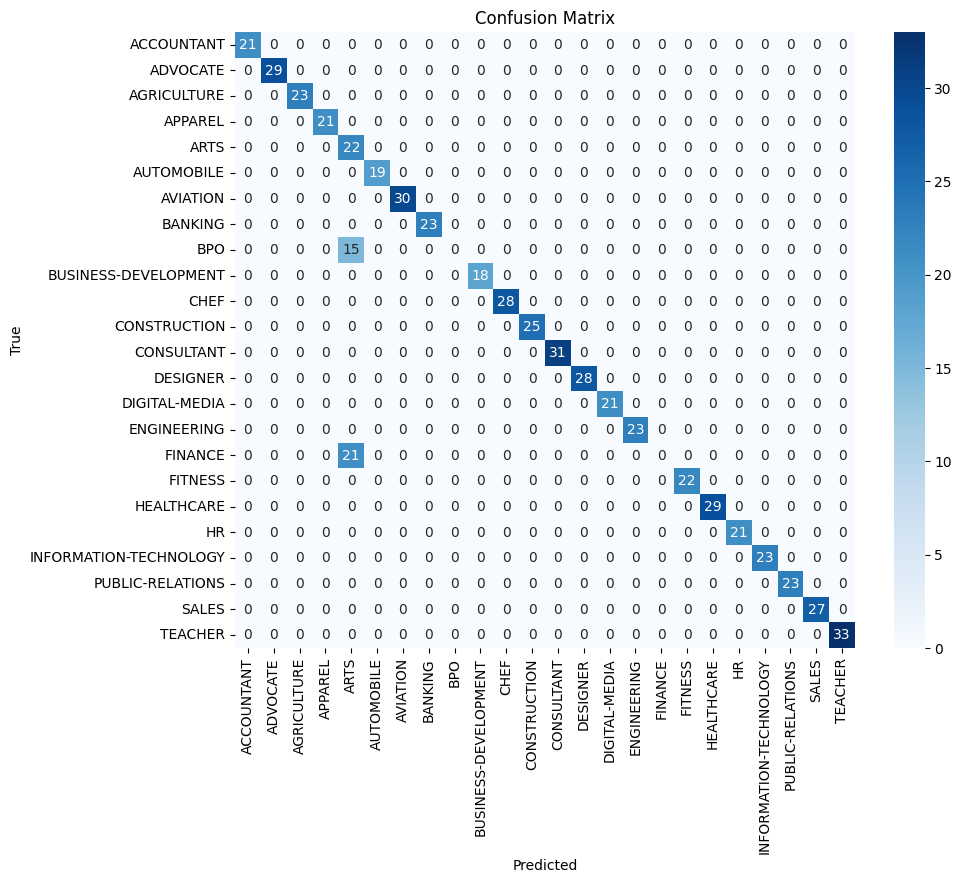

In [49]:

#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [38]:
print(x_train_tfidf.shape)
print(y_train.shape)

(2303, 29780)
(576,)


In [45]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

                        precision    recall  f1-score   support

            ACCOUNTANT       1.00      1.00      1.00        21
              ADVOCATE       1.00      1.00      1.00        29
           AGRICULTURE       1.00      1.00      1.00        23
               APPAREL       1.00      1.00      1.00        21
                  ARTS       1.00      1.00      1.00        22
            AUTOMOBILE       1.00      1.00      1.00        19
              AVIATION       1.00      1.00      1.00        30
               BANKING       1.00      1.00      1.00        23
                   BPO       0.00      0.00      0.00        15
  BUSINESS-DEVELOPMENT       1.00      1.00      1.00        18
                  CHEF       1.00      1.00      1.00        28
          CONSTRUCTION       1.00      1.00      1.00        25
            CONSULTANT       1.00      1.00      1.00        31
              DESIGNER       0.65      1.00      0.79        28
         DIGITAL-MEDIA       1.00      

/home/martin/Desktop/Resume Screening & Recommendation/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/martin/Desktop/Resume Screening & Recommendation/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/martin/Desktop/Resume Screening & Recommendation/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter t